# Chrome Dino re-write 2023

Use Pytorch, stable-baselines3, etc. to implement an agent to play chrome://dino with reinforcement learning.

## dependencies
- CUDA-enabled Pytorch (Pytorch 2.00; CUDA 1.18)
- Stable-Baselines3 (with extras like OpenCV): https://stable-baselines3.readthedocs.io/en/master/
- Protobuf (a training dependency) (3.20.*)
- pytesseract (interface to Google Tesseract)
- Google Tesseract-OCR ((5.3.1.20230401)
- Gym (gym v0.21 since this is used by Stable-Baselines3; RL environment library): https://gymnasium.farama.org/
- MSS (crossplatform screenshots)
- openCV (2)
- selenium (chrome test driver)

In [1]:
%%capture
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [2]:
%%capture
# needed to support old version of gym (0.21) used with Stable-Baselines3
# gym 0.21 has installation issue; gym moved to Gymnasium; SB3 still does not support Gymnasium 
!pip install setuptools==66 Cmake git+https://github.com/openai/gym.git@9180d12e1b66e7e2a1a622614f787a6ec147ac40

In [3]:
%%capture
!pip install stable-baselines3[extra] protobuf==3.20.*

In [18]:
%%capture
!pip install mss pydirectinput pytesseract selenium

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from mss import mss
from gym import Env
from gym.spaces import Box, Discrete

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options

## set up environment

In [14]:
# create a base Gym environment for managing state
# Env must implement step and reset; optionally, render 
# https://www.gymlibrary.dev/api/core/
class ChromeDinoRL(Env):
    
    # initialize environment spaces
    def __init__(self):
        super().__init__()
        
        # set up observations and actions
        # multidimensional array as return output from observation (an image)
        self.observation_space = Box(low=0, high=255, shape=(1,83,100), dtype=np.uint8)
        # two actions: jump or not
        self.action_space = Discrete(2)
        
        # observation parameters
        self.capture = mss()
        self.game_window = {'top':300, 'left':0, 'width':600, 'height':500}
        self.game_over_window = {'top':405, 'left':630, 'width':660, 'height':70}
        
        
    # run one timestep in the environment
    def step(self, action):
        # 0 -> spacebar, 1 -> noop
        action_map = {
            0: 'space',
            1: 'no_op'
        }
        
        
    # reset to initial state, return initial observation
    def reset(self):
        pass
        
    # compute render frames for visualization; render with cv2
    # close everything with "q" 
    def render(self):
        cv2.imshow('Chrome Dino', self.current_frame)
        if cv2.waitKey(1) & 0xFF = ord('q'):
            cv2.destroyAllWindows()
        
    # do an observation
    def observe_environment(self):
        pass
        
    # identify game over
    def game_over(self):
        pass
    

In [15]:
# test environment
env = ChromeDinoRL()

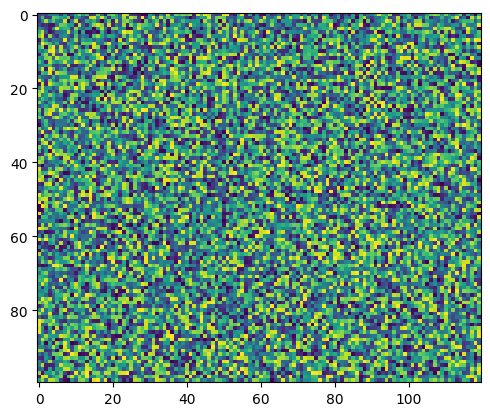

In [16]:
# random action; observation space empty
env.action_space.sample()
plt.imshow(env.observation_space.sample()[0])

## train model

Train the DQN and save it using a Stable-Baselines3 callback

In [ ]:
# training imports
from stable_baselines3 import DQN
from stablebaselines3.common.callbacks import BaseCallback
import os